In [2]:
%pip install joblib scikit-learn matplotlib graphviz dtreeviz


Note: you may need to restart the kernel to use updated packages.


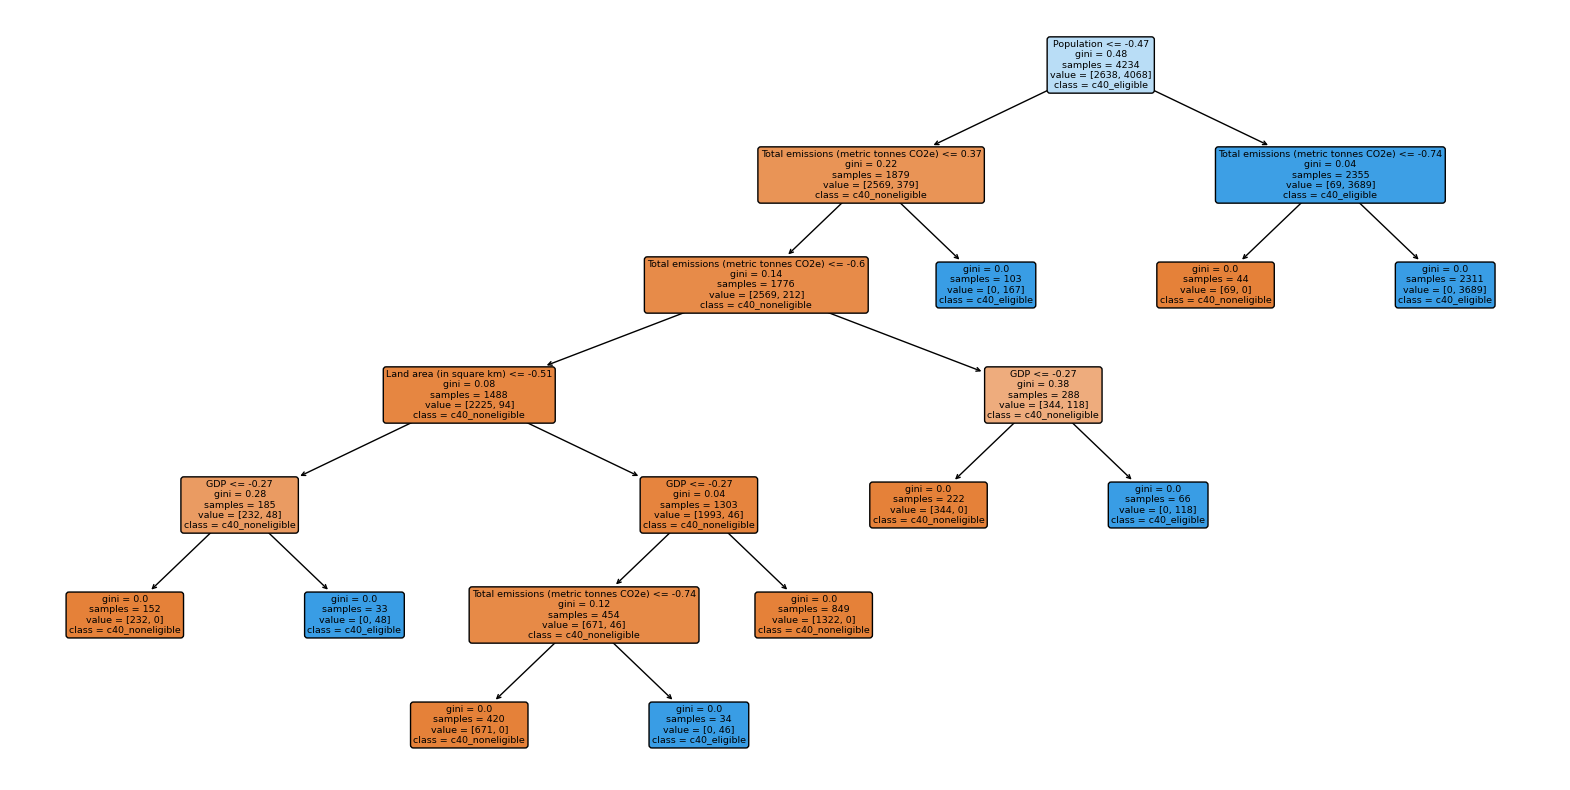

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming rf_model is your trained Random Forest model loaded from 'trained_model.joblib'
# and you have already executed the code to load it

# Choose one of the trees from your Random Forest model
tree = rf_model.named_steps['classifier'].estimators_[0]

# Use plot_tree to visualize the tree; this requires matplotlib
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(tree, 
          feature_names=["Total emissions (metric tonnes CO2e)", "Population", "GDP", "Land area (in square km)", "AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"], 
          class_names=["c40_noneligible", "c40_eligible"],  # Replace class_names with your actual target names
          filled=True, rounded=True, proportion=False, precision=2)
plt.show()


our goal with this project is to categorize cities into one of two classes: eligible or not eligible based on their pollution levels and data about their population.

we have made a random forest model to predict the eligibility of a city based on the given data, we have also cross-validated the model to make sure it is not overfitting. and we even let the user determine what parameters we should use to train the model, besides that we have made calculations to determine the most important features in the model. so the user can know what features are the most important in determining the eligibility of a city.

our random forest model uses multiple decision trees to make predictions, it can handle numeric values as well as categorical values. the decision trees then break down the data into smaller subsets based on the feature values, and then it makes predictions based on the majority class of the subset. and then the random forest model makes predictions based on the majority vote of the decision trees.

since handing in the project for assessment, we've tried to cross-validate our model with a higher number of folds. our standard model is folded 5 times, but we've since folded our model 15 times (that takes a lot of time)
and have seen multiple results that our mean coefficient is 1 or a little bit below 1, which means that our model is not overfitting.

at the start of our project we tried to use kmeans clustering, we thought that the clusters looked a bit weird and we didn't know how to use the clusters to predict the eligibility of a city. i've since learned that with our data it's not possible to use kmeans clustering to predict the eligibility of a city, since kmeans clustering is unsupervised learning and we need supervised learning because we already have the labels for the cities, even though we remove the labels to train the model, we still have the labels to compare the predictions to.

also since our data doesn't include more than one observation pr city, we cant make predictions for a city's future, but we can compare the already known members on C40 and then measure based on that data, wether or not a non-member city is eligible to join C40.

as you can see from the decision tree above, our model has already figured out which features are most important for determining if a city is eligible to join c40 or not, so even if i choose to add and train the model on more features, the model will still use the same features to make predictions, so i don't think it's necessary to add more features to the model.

we have also made a confusion matrix to see how well our model is performing, and we have also made a classification report to see the precision, recall, and f1-score of our model.

<Figure size 2500x2000 with 0 Axes>

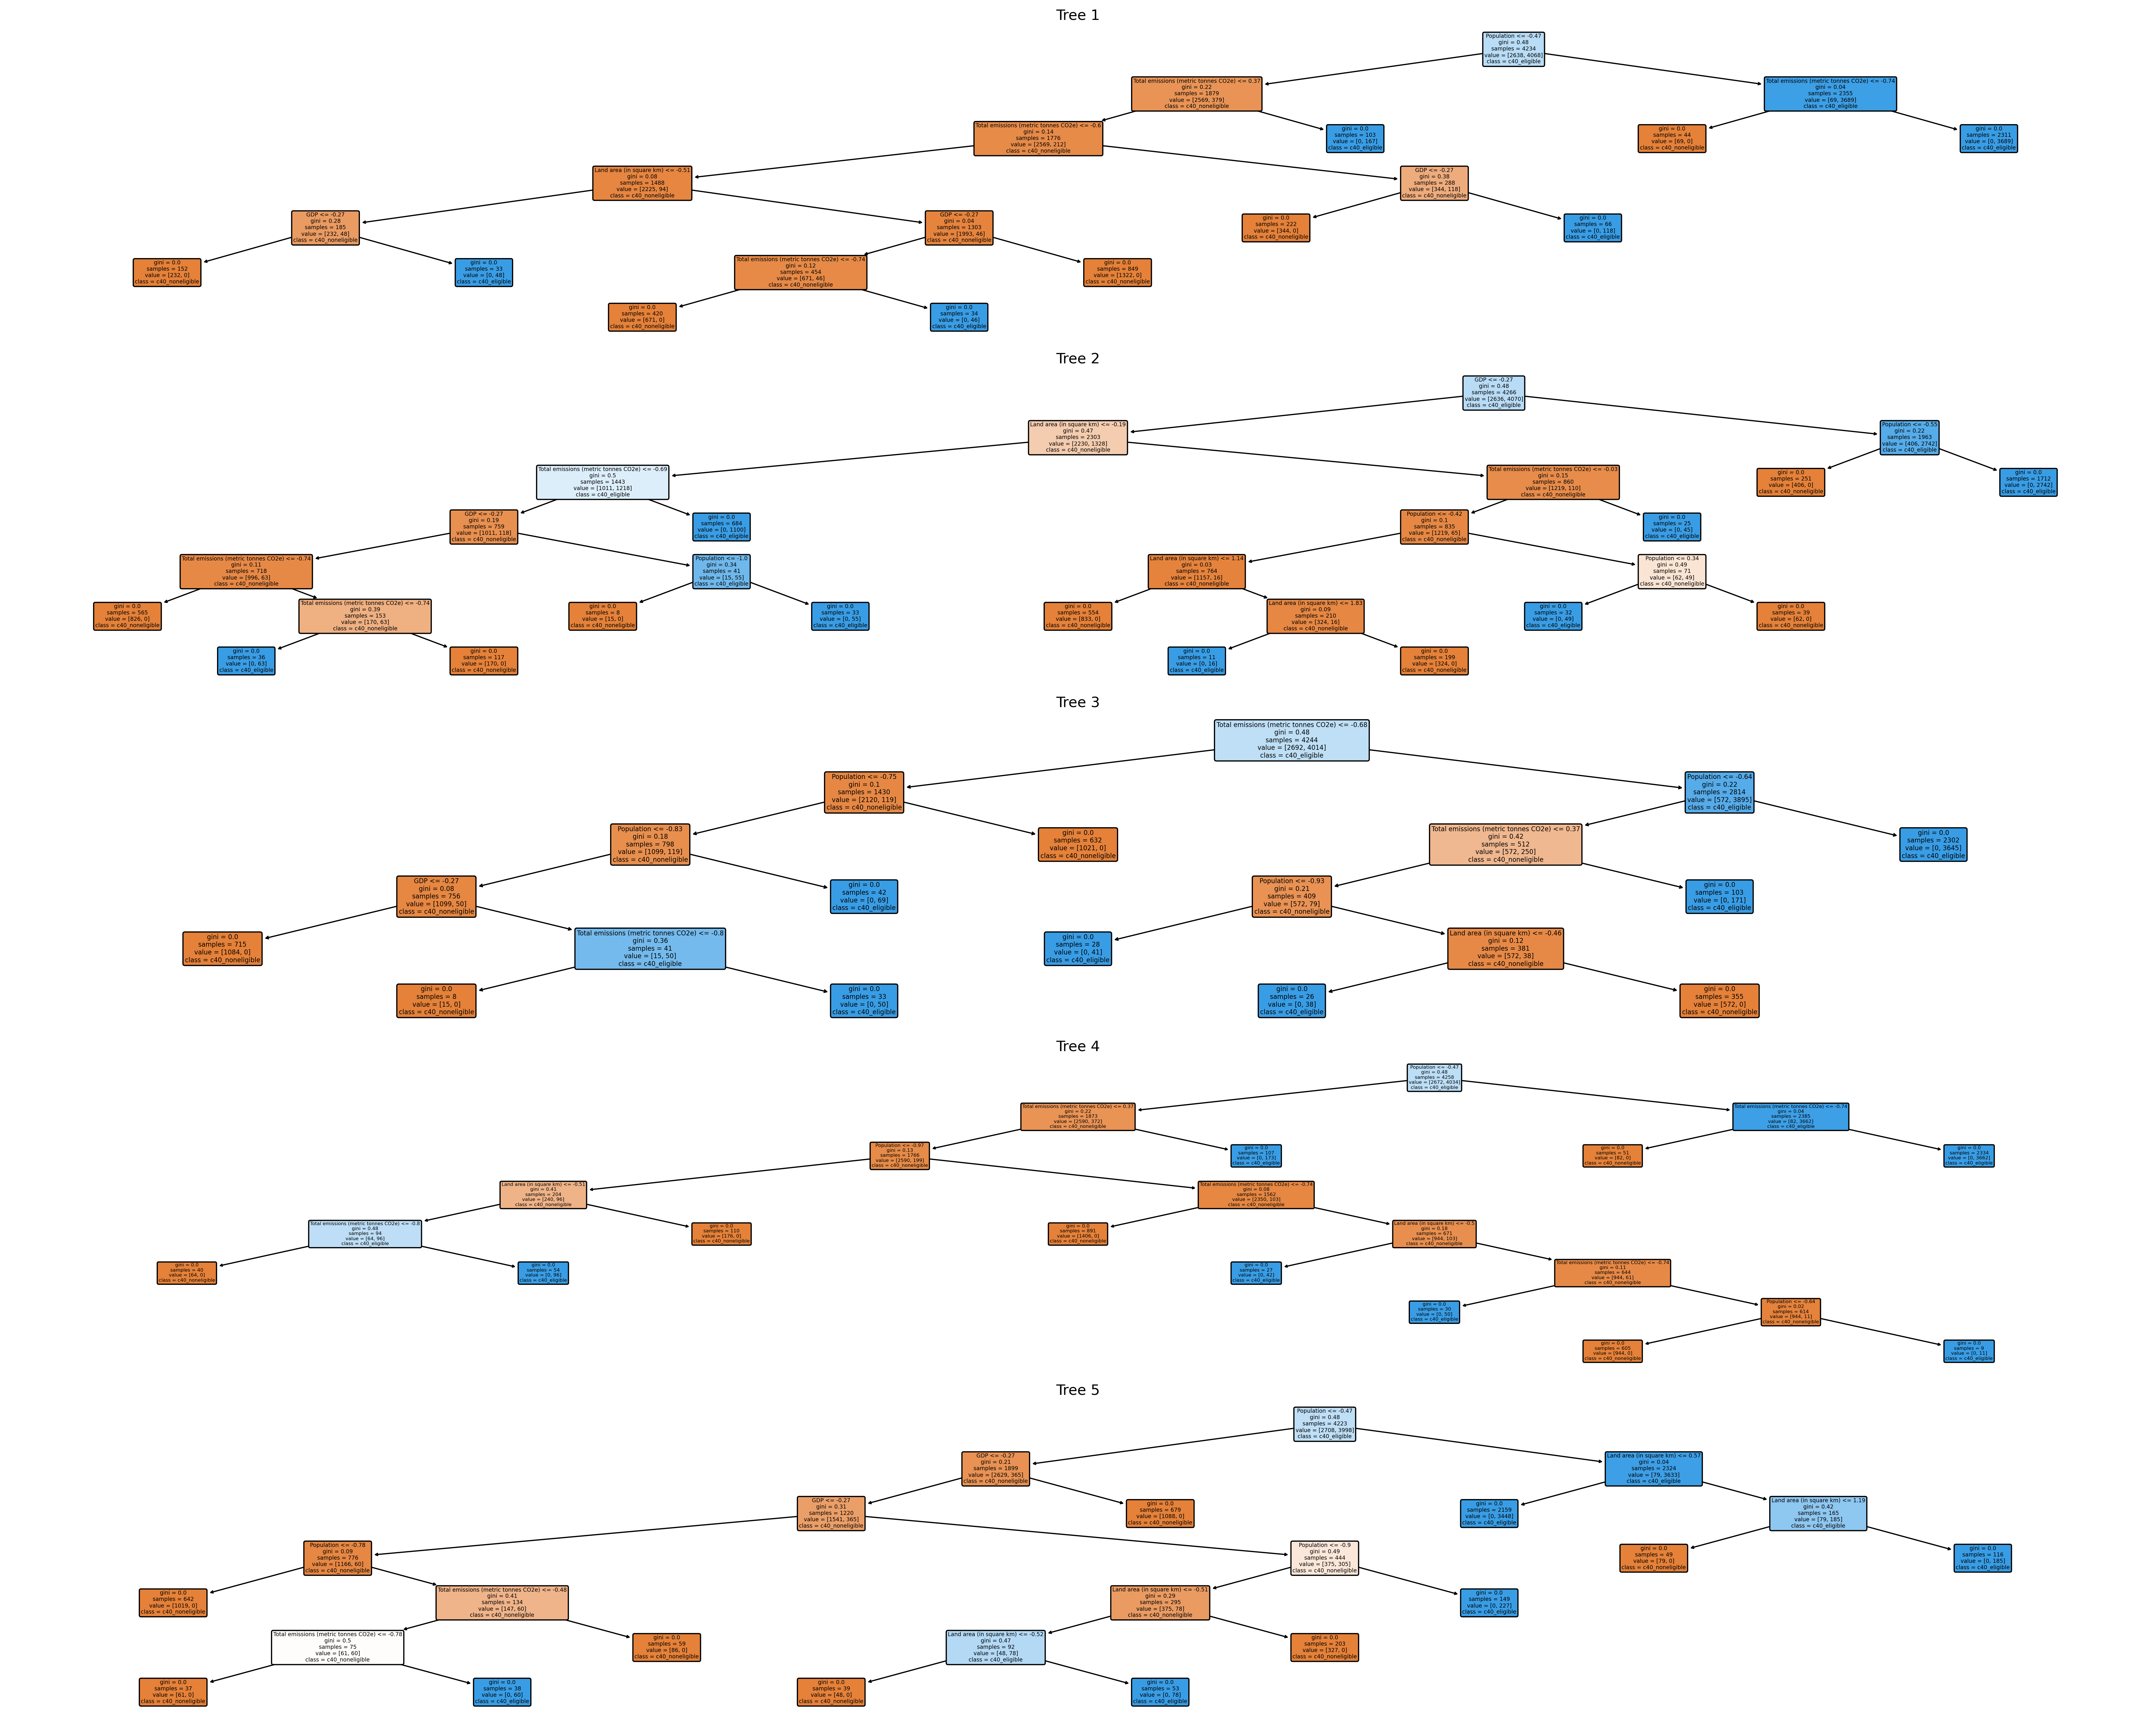

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming rf_model is your trained Random Forest model loaded from 'trained_model.joblib'
# and you have already executed the code to load it

# Set up the figure size and layout
plt.figure(figsize=(25, 20))  # Increase the overall figure size
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(25, 20), dpi=300)  # Adjust nrows for the number of trees

for i in range(5):  # Adjust this range to show more trees
    tree = rf_model.named_steps['classifier'].estimators_[i]
    
    plot_tree(tree, 
              feature_names=["Total emissions (metric tonnes CO2e)", "Population", "GDP", "Land area (in square km)", "AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"], 
              class_names=["c40_noneligible", "c40_eligible"],  # Replace class_names with your actual target names
              filled=True, rounded=True, proportion=False, precision=2,
              ax=axes[i])  # Plot each tree in its subplot
    
    axes[i].set_title(f'Tree {i+1}')  # Optional: Add a title to each subplot for clarity

plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()


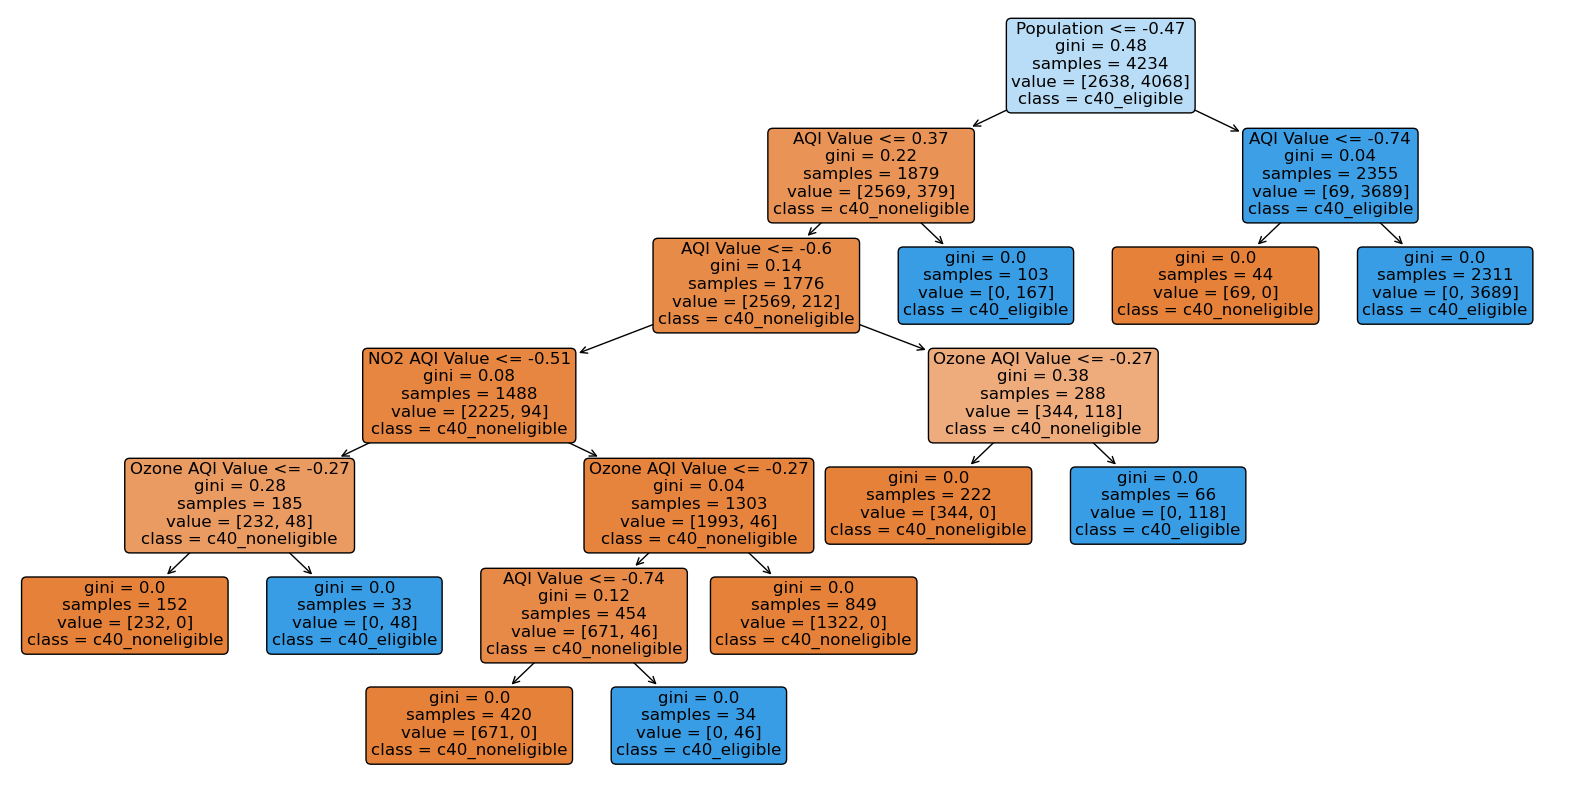

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming rf_model is your trained Random Forest model loaded from 'trained_model.joblib'
# and you have already executed the code to load it

# Choose one of the trees from your Random Forest model
tree = rf_model.named_steps['classifier'].estimators_[0]

# Use plot_tree to visualize the tree; this requires matplotlib
plt.figure(figsize=(20, 10))  # Adjust the size as needed
plot_tree(tree, 
          feature_names=["AQI Value", "Population", "Ozone AQI Value", "NO2 AQI Value"], 
          class_names=["c40_noneligible", "c40_eligible"],  # Replace class_names with your actual target names
          filled=True, rounded=True, proportion=False, precision=2)
plt.show()
